In [1]:
#Use in Markup cell type
#![alt text](imagename.png "Title")

In [4]:
###1. Load Data and Splot Data
import tensorflow.python.framework.dtypes
from keras.datasets import mnist
from keras.models import Sequential 
from keras.layers.core import Dense, Activation
from keras.utils import np_utils
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

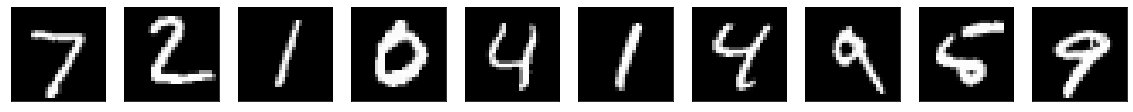

In [6]:
import matplotlib.pyplot as plt
n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(X_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()
plt.close()

In [7]:
print("Previous X_train shape: {} \nPrevious Y_train shape:{}".format(X_train.shape, Y_train.shape))
X_train = X_train.reshape(60000, 784)     
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype('float32')     
X_test = X_test.astype('float32')     
X_train /= 255    
X_test /= 255
classes = 10
Y_train = np_utils.to_categorical(Y_train, classes)     
Y_test = np_utils.to_categorical(Y_test, classes)
print("New X_train shape: {} \nNew Y_train shape:{}".format(X_train.shape, Y_train.shape))

Previous X_train shape: (60000, 28, 28) 
Previous Y_train shape:(60000,)
New X_train shape: (60000, 784) 
New Y_train shape:(60000, 10)


In [8]:
input_size = 784
batch_size = 200   
hidden1 = 400
hidden2 = 20
epochs = 2

In [9]:
###4.Build the model
model = Sequential()     
model.add(Dense(hidden1, input_dim=input_size, activation='relu'))
# output = relu (dot (W, input) + bias)
model.add(Dense(hidden2, activation='relu'))
model.add(Dense(classes, activation='softmax')) 

# Compilation
model.compile(loss='categorical_crossentropy', 
    metrics=['accuracy'], optimizer='sgd')
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 400)               314000    
_________________________________________________________________
dense_2 (Dense)              (None, 20)                8020      
_________________________________________________________________
dense_3 (Dense)              (None, 10)                210       
Total params: 322,230
Trainable params: 322,230
Non-trainable params: 0
_________________________________________________________________


In [10]:
# Fitting on Data
model.fit(X_train, Y_train, batch_size=batch_size, epochs=10, verbose=2)
###5.Test


Epoch 1/10
 - 1s - loss: 1.5441 - accuracy: 0.5986
Epoch 2/10
 - 1s - loss: 0.6930 - accuracy: 0.8313
Epoch 3/10
 - 1s - loss: 0.4866 - accuracy: 0.8724
Epoch 4/10
 - 1s - loss: 0.4080 - accuracy: 0.8891
Epoch 5/10
 - 1s - loss: 0.3652 - accuracy: 0.8989
Epoch 6/10
 - 1s - loss: 0.3369 - accuracy: 0.9065
Epoch 7/10
 - 1s - loss: 0.3157 - accuracy: 0.9120
Epoch 8/10
 - 1s - loss: 0.2989 - accuracy: 0.9170
Epoch 9/10
 - 1s - loss: 0.2845 - accuracy: 0.9212
Epoch 10/10
 - 1s - loss: 0.2723 - accuracy: 0.9242


10000/10000 [==============================] - 0s 14us/step

Test accuracy: 0.9276000261306763
[3 1 3 6 7 2 7 1 2 1]


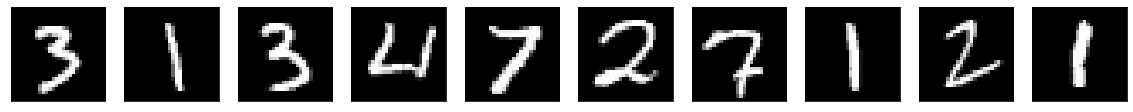

In [16]:
score = model.evaluate(X_test, Y_test, verbose=1)
print('\n''Test accuracy:', score[1])
mask = range(30,40)
X_valid = X_test[mask]
y_pred = model.predict_classes(X_valid)
print(y_pred)
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(X_valid[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()
plt.close()